In [122]:
import rdkit
import copy
from rdkit import Chem 
from rdkit.Chem import Draw, Kekulize, SanitizeMol
from rdkit.Chem.rdmolops import CombineMols

In [173]:
def idx_annotate(x):
    mol = copy.deepcopy(x)
    for idx in range(mol.GetNumAtoms()):
        mol.GetAtomWithIdx(idx).SetProp(
            'molAtomMapNumber', 
            str(mol.GetAtomWithIdx(idx).GetIdx())
        )
    return mol

def mol(x) : 
    return Chem.MolFromSmiles(x)

def draw(x) : 
    if type(x) == str : x = mol(x)
    Draw.MolToImage(x).show()

In [174]:
purine = Chem.MolFromSmiles('C1=C2C(=NC=N1)N=CN2')
addition = Chem.MolFromSmiles('CNC[C@@H](C)O')

In [169]:
def auto_add(x, y) : 
    if type(x) == str : x = mol(x)
    if type(y) == str : y = mol(y)
    
    draw(idx_annotate(x))
    
    idx = int(input('Specify the idx'))

    combo = CombineMols(x, y) 
    output = []

    for i in range(x.GetNumAtoms()) :
        for j in range(x.GetNumAtoms(), combo.GetNumAtoms()) :
            for b in [Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE, Chem.rdchem.BondType.TRIPLE] :
                combo_editable = Chem.EditableMol(combo)
                combo_editable.AddBond(i, j, order=b)

                try : 
                    Chem.SanitizeMol(combo_editable.GetMol())
                    output.append(Chem.MolToSmiles(combo_editable.GetMol()))
                except :
                    print('Failed')
    return output

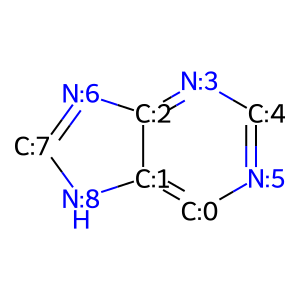

Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed


[21:42:49] Explicit valence for atom # 12 C, 5, is greater than permitted
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7
[21:42:49] Explicit valence for atom # 12 C, 5, is greater than permitted
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7
[21:42:49] Explicit valence for atom # 12 C, 5, is greater than permitted
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7
[21:42:49] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 

In [170]:
output = auto_add(purine, addition)

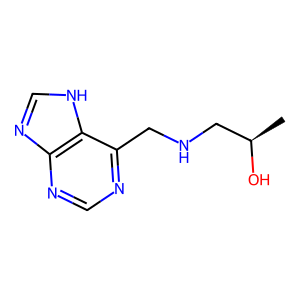

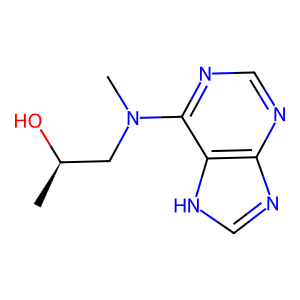

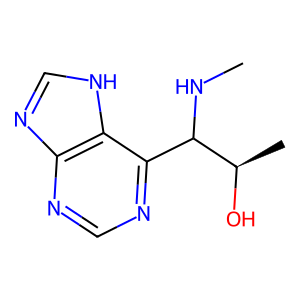

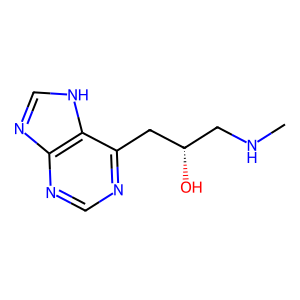

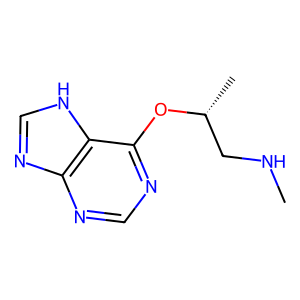

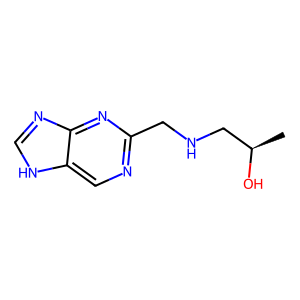

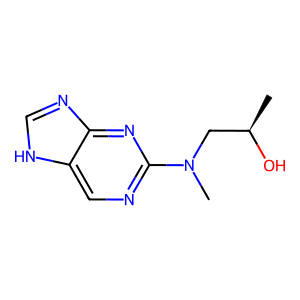

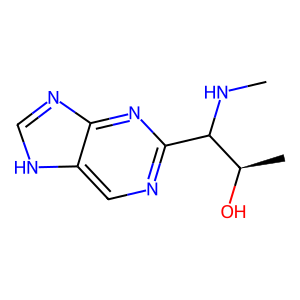

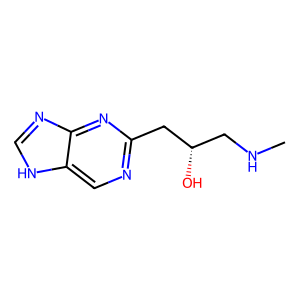

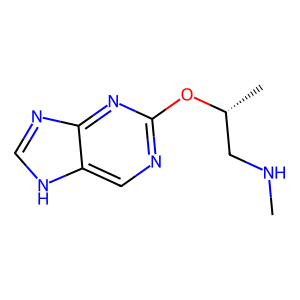

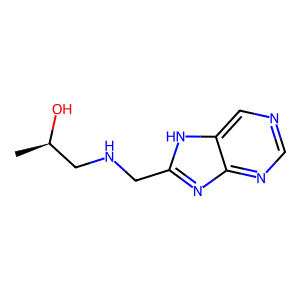

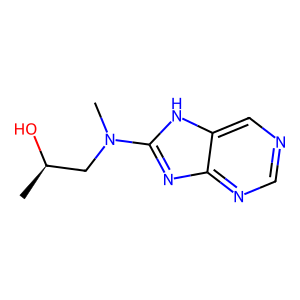

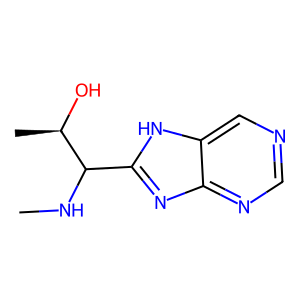

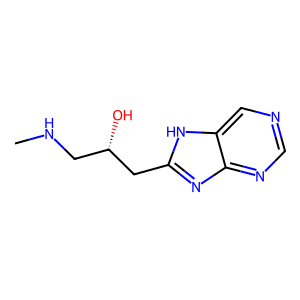

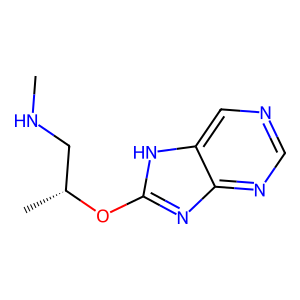

In [175]:
for i in output : 
    draw(i)